In [57]:
#import things
#numpy pandas scipy math matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split


In [58]:
#classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [59]:
#feature enegineering tools
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [60]:
#model metrics classification
from sklearn.metrics import accuracy_score, classification_report


In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [62]:
#for imbalanced samples we can use this
from imblearn.over_sampling import SMOTE

In [63]:
np.random.seed(123)

In [64]:
#data 
rawData = pd.read_csv('credit_modified.csv',header=0)
rawData.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [7]:
#categorical features
#sex, education, marriage

#numerical features
#limit_bal, age, pay features, bill_amt features, pay amt features

In [65]:
#pre pocessing to set numerical and categorical variables


# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['AGE', 'LIMIT_BAL','BILL_AMT1','BILL_AMT2',
                   'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
                   'PAY_AMT5','PAY_AMT6']
#numeric_features = ['PAY_0','PAY_3','PAY_6']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
#categorical_features = ['SEX', 'MARRIAGE']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=5)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])




In [66]:
#select all features
features = rawData.iloc[:,0:23]
print('Summary of features sample')
features.head()

Summary of features sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
3,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
4,50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800


In [67]:
#dependent variable
depVar = rawData['default payment next month']

In [68]:
# set X and y for test train split
X = features
y = depVar

In [69]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=5)

In [135]:
#fix sample imbalance see https://beckernick.github.io/oversampling-modeling/
#removed because it worsened results
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
X_train_res_df = pd.DataFrame(X_train_res, columns = features.columns)


In [76]:
X_train.shape, X_test.shape

((24214, 23), (6716, 23))

In [134]:
indices = list(features)

labels = np.asarray(indices)


In [72]:
#classification models
modelKNN = KNeighborsClassifier()
modelTree = DecisionTreeClassifier()
modelGBC = GradientBoostingClassifier()
modelSVM = LinearSVC()


In [87]:
#run the models and check scores
model=modelKNN
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))


model score: 0.821


In [88]:
#run the models and check scores
model=modelTree
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.821


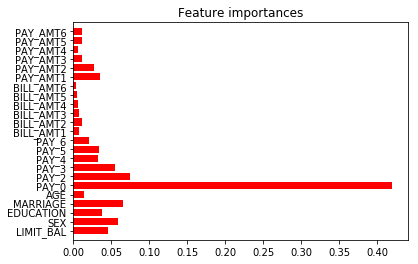

model score: 0.783


In [136]:
#run the models and check scores
model=modelGBC
modelGBC.fit(X_train, y_train)
importances = modelGBC.feature_importances_
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances,
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(np.arange(23), labels)
plt.ylim([-1, X_train.shape[1]])
plt.show()


clf.fit(X_train, y_train)
model.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

In [90]:
#run the models and check scores
model=modelSVM
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.821


In [137]:
#make predictions after picking model
model = modelGBC
predictions = clf.predict(X_test)
predReport = classification_report(y_test,predictions)
Accuracy = accuracy_score(y_test, predictions)
print(predReport)
print('Accuracy: %.3f' % Accuracy)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5211
           1       0.51      0.55      0.53      1505

   micro avg       0.78      0.78      0.78      6716
   macro avg       0.69      0.70      0.70      6716
weighted avg       0.79      0.78      0.79      6716

Accuracy: 0.783
